In [2]:
from random import *
from itertools import combinations


def minConflicts(constraints, maxIter, numWizards):
    currentState = [[False for x in range(numWizards)] for y in range(numWizards)] #matrix of current booleans
    for r in range(numWizards):
        for c in range(r):
            currentState[r][c]=True #possibly might change this to linearized index
    prevConflicts = 0
    for i in range(maxIter):
        conflicts = numberConflicting(currentState, constraints)
        if conflicts == 0:
            print("SATISFIED", i)
            return currentState, i
        maxResolve = 0
        maxRow = -1
        maxCol = -1
        if conflicts - prevConflicts == 0:
#             print(conflicts)
#             print("kick")
            currentState = kick(currentState)
        else:
            for r in range(numWizards):
                for c in range(r):
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
                    newConflicts = numberConflicting(currentState, constraints)
                    if conflicts - newConflicts > maxResolve:
                        maxResolve = conflicts - newConflicts
                        maxRow = r
                        maxCol = c
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
            
            currentState[maxRow][maxCol] = not currentState[maxRow][maxCol]
            currentState[maxCol][maxRow] = not currentState[maxCol][maxRow]
        prevConflicts = conflicts
    print("GIVEN UP after", maxIter, "iterations")
    return currentState, maxIter

def kick(currentState):
    num_wizards = len(currentState)
    for i in range(num_wizards//7):
        r = int(random()*num_wizards)
        c = int(random()*num_wizards)
        currentState[r][c] = not currentState[r][c]
        currentState[c][r] = not currentState[c][r]
    return currentState

def numberConflicting(currentState, constraints):
    conflicts = 0
    for c in constraints:
        if isConflicting(currentState, c):
            conflicts += 1
    return conflicts
        
def isConflicting(currentState, c):
    return not ((currentState[c[2]][c[0]] and currentState[c[2]][c[1]]) 
            or (currentState[c[0]][c[2]] and currentState[c[1]][c[2]]) )

def prettyPrint(a):
    for r in range (len(a)):
            print(a[r])

import matplotlib.pyplot as plt

from random import shuffle, sample
from itertools import combinations

def make_ordering(n):
    """Generates a random ordering of n wizards, returned as a
    shuffled list containing the elements 0, 1, ..., n-1"""
    order = list(range(n))
    shuffle(order)
    return order

def make_constraints(order, num_constraints=500):
    """Randomly generates constraints on the wizards' ordering,
    where a constraint [a b c] means c is not between a and b."""
    combos = []
    
    for i in range(len(order)):
        for j in range(i + 1, len(order)):
            for k in range(0, i):
                combos.append((order[i], order[j], order[k]))
            for k in range(j + 1, len(order)):
                combos.append((order[i], order[j], order[k]))
    return sample(combos, num_constraints)

In [3]:
n = 10
order = make_ordering(n)
constraints = make_constraints(order, 100)
a, i = minConflicts(constraints, 10000, n)
print(a, i)


SATISFIED 245
[[False, True, False, False, True, False, True, True, False, False], [False, False, False, False, True, False, False, True, False, False], [True, True, False, False, True, False, True, True, False, False], [True, True, True, False, True, False, True, True, False, False], [False, False, False, False, False, False, False, False, False, False], [True, True, True, True, True, False, True, True, False, False], [False, True, False, False, True, False, False, True, False, False], [False, False, False, False, True, False, False, False, False, False], [True, True, True, True, True, True, True, True, False, True], [True, True, True, True, True, True, True, True, False, False]] 245


In [4]:
# ************ CHANGE THIS **************** #
n_wizards = 35
#############################################


data = {}

MAX_ITER = 60000

n_samples = 5

c_counts = [20 * c for c in list(range(5,26))] # 100 to 500, intervals of 20

for c_count in c_counts:
    data[c_count] = []
    print("----------------")
    print("constraint count", c_count)
    for i in range(n_samples):
        print()
        print("sample", i)
        order = make_ordering(n_wizards)
        constraints = make_constraints(order, c_count)
        state, iters = minConflicts(constraints, MAX_ITER, n_wizards)
        
        data[c_count].append((order, constraints, state, iters))
        
        

----------------
constraint count 100

sample 0
SATISFIED 39

sample 1
SATISFIED 39

sample 2
SATISFIED 205

sample 3
SATISFIED 34

sample 4
SATISFIED 38
----------------
constraint count 120

sample 0
SATISFIED 106

sample 1
SATISFIED 135

sample 2
SATISFIED 275

sample 3
SATISFIED 37

sample 4
SATISFIED 2618
----------------
constraint count 140

sample 0
SATISFIED 405

sample 1
SATISFIED 2761

sample 2
SATISFIED 319

sample 3
SATISFIED 716

sample 4
SATISFIED 414
----------------
constraint count 160

sample 0
SATISFIED 875

sample 1
SATISFIED 515

sample 2
SATISFIED 273

sample 3
SATISFIED 1464

sample 4
SATISFIED 121
----------------
constraint count 180

sample 0
SATISFIED 667

sample 1
SATISFIED 1046

sample 2
SATISFIED 595

sample 3
SATISFIED 359

sample 4
SATISFIED 121
----------------
constraint count 200

sample 0
SATISFIED 955

sample 1
SATISFIED 2845

sample 2
SATISFIED 2259

sample 3
SATISFIED 1912

sample 4
SATISFIED 1824
----------------
constraint count 220

sample 0
S

KeyboardInterrupt: 

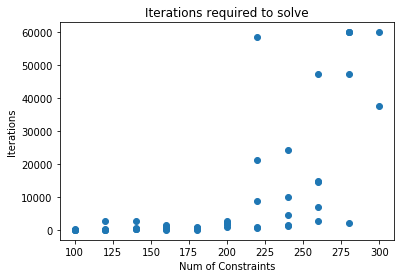


160 constraints
mean 649.6 med 273 max 1464

200 constraints
mean 1959.0 med 2259 max 2845

100 constraints
mean 71.0 med 205 max 205

220 constraints
mean 18065.0 med 963 max 58646

260 constraints
mean 17287.2 med 14564 max 47209

300 constraints
mean 48775.0 med 37550 max 60000

120 constraints
mean 634.2 med 275 max 2618

180 constraints
mean 557.6 med 595 max 1046

140 constraints
mean 923.0 med 319 max 2761

240 constraints
mean 8277.0 med 4584 max 24237

280 constraints
mean 45916.4 med 47440 max 60000


In [5]:
# PLOTTING
xs, ys = [], []

for k, v in data.items():
    for result in v:
        xs.append(k)
        ys.append(result[3])
plt.title("Iterations required to solve")
plt.xlabel("Num of Constraints")
plt.ylabel("Iterations")
plt.scatter(xs, ys)
plt.show()

for k, v in data.items():
    print()
    print(k, "constraints")
    iters_all = [result[3] for result in v]
    print("mean", sum(iters_all)/len(iters_all), "med", iters_all[len(iters_all)//2], "max", max(iters_all))
    


In [6]:
import json

with open('data-Andrew-35.txt', 'w') as outfile:
    json.dump(data, outfile)

In [12]:
for k, v in data.items():
    print(k, [r[3] for r in v])
    
for i in range(len(data[280])):
    if data[280][i][3] == 60000:
        with open('failure-Andrew-35-' + str(i) + ".txt", 'w') as outfile:
            json.dump(data[280][i], outfile)

160 [875, 515, 273, 1464, 121]
200 [955, 2845, 2259, 1912, 1824]
100 [39, 39, 205, 34, 38]
220 [8865, 21133, 963, 718, 58646]
260 [2633, 14925, 14564, 47209, 7105]
300 [60000, 37550]
120 [106, 135, 275, 37, 2618]
180 [667, 1046, 595, 359, 121]
140 [405, 2761, 319, 716, 414]
240 [1558, 9926, 4584, 24237, 1080]
280 [60000, 60000, 47440, 60000, 2142]
